In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('D:\downloads\stu.csv')

In [3]:
raw_data

,STUDENT,SAT,GPA,ATTENDANCE
0,A,1900,5.00,YES
1,B,1890,4.01,NO
2,C,1750,3.65,YES
3,D,1800,4.55,YES
4,E,1987,5.10,NO


In [4]:
data = raw_data.copy()

In [5]:
data['ATTENDANCE'] = data['ATTENDANCE'].map({'YES':1,'NO':0})

In [7]:
data

,STUDENT,SAT,GPA,ATTENDANCE
0,A,1900,5.00,1
1,B,1890,4.01,0
2,C,1750,3.65,1
3,D,1800,4.55,1
4,E,1987,5.10,0


In [9]:
data.describe()

,SAT,GPA,ATTENDANCE
count,5.000000,5.000000,5.000000
mean,1865.400000,4.462000,0.600000
std,92.443496,0.626075,0.547723
min,1750.000000,3.650000,0.000000
25%,1800.000000,4.010000,0.000000
50%,1890.000000,4.550000,1.000000
75%,1900.000000,5.000000,1.000000
max,1987.000000,5.100000,1.000000


In [10]:
y = data ['GPA']
x1 = data[['SAT','ATTENDANCE']]

In [13]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

D:\anaconda\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     8.924
Date:                Thu, 23 May 2024   Prob (F-statistic):              0.101
Time:                        18:31:16   Log-Likelihood:                 1.5420
No. Observations:                   5   AIC:                             2.916
Df Residuals:                       2   BIC:                             1.744
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.2496      4.263     -3.108      0.090     -31.591       5.092
SAT            0.0092      0.002      4.181      0.053      -0.000       0.019
ATTENDANCE     0.9640      0.371      2.600      0.122      -0.631       2.559
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.529
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.682
Skew:                           0.737   Prob(JB):                        0.711
Kurtosis:                       1.952   Cond. No.                     6.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

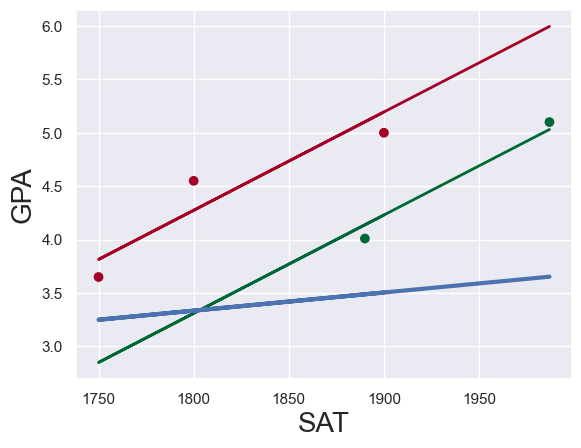

In [19]:
plt.scatter(data['SAT'],y,c=data['ATTENDANCE'],cmap='RdYlGn_r')
yhat_no = -13.2496 + 0.0092*data['SAT']
yhat_yes = -12.2856 +0.0092*data['SAT']
yhat = 0.0017*data['SAT']+0.275
fig = plt.plot(data['SAT'],yhat_no ,lw=2, c='#006837')
fig = plt.plot(data['SAT'],yhat_yes,lw=2, c= '#a50026')
fig = plt.plot(data['SAT'],yhat,lw =3,c='#4C72B0')
plt.xlabel('SAT',fontsize = 20)
plt.ylabel('GPA',fontsize = 20)
plt.show()

In [21]:
new_data = pd.DataFrame({'const':1,'SAT':[1700,1670],'ATTENDANCE':[0,1]})
new_data = new_data[['const','SAT','ATTENDANCE']]
new_data

,const,SAT,ATTENDANCE
0,1,1700,0
1,1,1670,1


In [24]:
predictions = results.predict(new_data)
predictions
                            

0    2.364438
1    3.052904
dtype: float64

In [25]:
predictionsdf=pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0:'B',1:'A'})

NameError: name 'Alice' is not defined